# 📊 Linear Regression: Train-Test Split vs Cross-Validation Comparison

### **Objective**:
In this notebook, we will compare the performance of a **Linear Regression** model using two different evaluation methods: **Train-Test Split** and **Cross-Validation**. We will use the **Boston Housing** dataset to evaluate the model's performance using **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)**. The goal is to determine which evaluation method provides a more reliable estimate of model performance.

### **Steps**:
1. **Load and preprocess the dataset**
2. **Train a Linear Regression model**
3. **Evaluate the model using Train-Test Split**
4. **Evaluate the model using Cross-Validation**
5. **Compare the results and visualize the predictions**
6. **Conclusions and insights**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

# Load CSV
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [2]:
X = df.drop("medv", axis=1)
y = df["medv"]

In [3]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"📊 Train-Test Split")
print(f"  MSE : {mse_test:.2f}")
print(f"  RMSE: {rmse_test:.2f}")

📊 Train-Test Split
  MSE : 24.29
  RMSE: 4.93


In [4]:
# Cross-Validation
mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)

print(f"\n🔁 5-Fold Cross-Validation")
print(f"  Fold MSEs : {mse_scores}")
print(f"  Avg MSE   : {mse_scores.mean():.2f}")
print(f"  Avg RMSE  : {rmse_scores.mean():.2f}")

# Get cross-validated predictions
y_pred_cv = cross_val_predict(model, X, y, cv=5)


🔁 5-Fold Cross-Validation
  Fold MSEs : [12.46030057 26.04862111 33.07413798 80.76237112 33.31360656]
  Avg MSE   : 37.13
  Avg RMSE  : 5.83


C:\Users\hp\AppData\Local\Temp\ipykernel_4116\2478145457.py:44: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  plt.tight_layout()
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


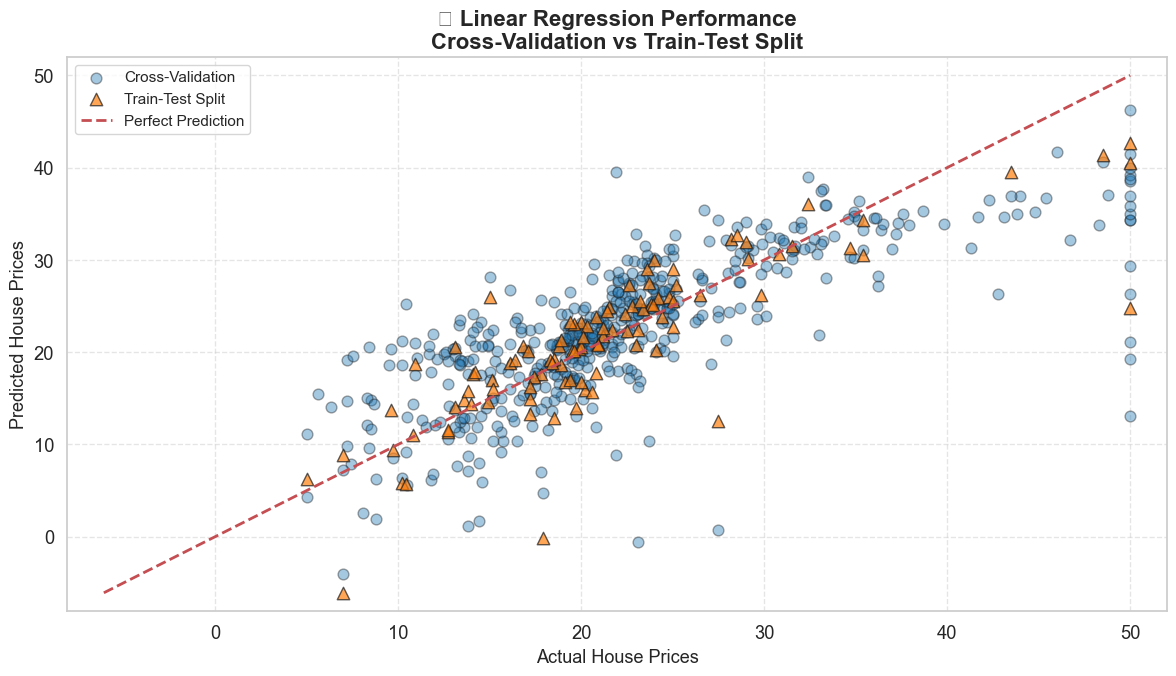

In [6]:
# Set style for aesthetics
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

# Visualization
plt.figure(figsize=(12, 7))

# Cross-validation predictions
plt.scatter(
    y, y_pred_cv,
    alpha=0.4,
    color="#1f77b4",  # blue
    edgecolor='k',
    label="Cross-Validation",
    s=60,
    marker='o'
)

# Train-test predictions
plt.scatter(
    y_test, y_pred_test,
    alpha=0.7,
    color="#ff7f0e",  # orange
    edgecolor='k',
    label="Train-Test Split",
    s=80,
    marker='^'
)

# Reference line (Perfect Prediction)
min_val = min(y.min(), y_pred_test.min())
max_val = max(y.max(), y_pred_test.max())
plt.plot(
    [min_val, max_val], [min_val, max_val],
    'r--', linewidth=2, label="Perfect Prediction"
)

# Add grid, labels, and legend
plt.xlabel("Actual House Prices", fontsize=13)
plt.ylabel("Predicted House Prices", fontsize=13)
plt.title("🏠 Linear Regression Performance\nCross-Validation vs Train-Test Split", fontsize=16, weight='bold')
plt.legend(frameon=True, fontsize=11)
plt.xlim(min_val - 2, max_val + 2)
plt.ylim(min_val - 2, max_val + 2)
plt.tight_layout()

# Add subtle background grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()
